In [1]:
import matplotlib.pyplot as plt
import pickle
import pandas as pd
import os, sys
from random import randint
from marvin.tools.maps import Maps
import numpy as np

[INFO]: No release version set. Setting default to MPL-11
[WARNING]: path /home/sshamsi_haverford_edu/sas/mangawork/manga/spectro/analysis/v3_1_1/3.1.0/dapall-v3_1_1-3.1.0.fits cannot be found. Setting dapall to None. (MarvinUserWarning)


In [2]:
sys.path.append(os.path.abspath('../'))
sys.path.append(os.path.abspath('../../GZ3D_production/'))

import sfr_methods
import gz3d_fits

In [3]:
plt.style.use('seaborn')
plt.style.use('seaborn-colorblind')

In [4]:
usable_paths = np.load('../usable_v3_paths.npy')

[WARNING]: Warning: converting a masked element to nan. (UserWarning)


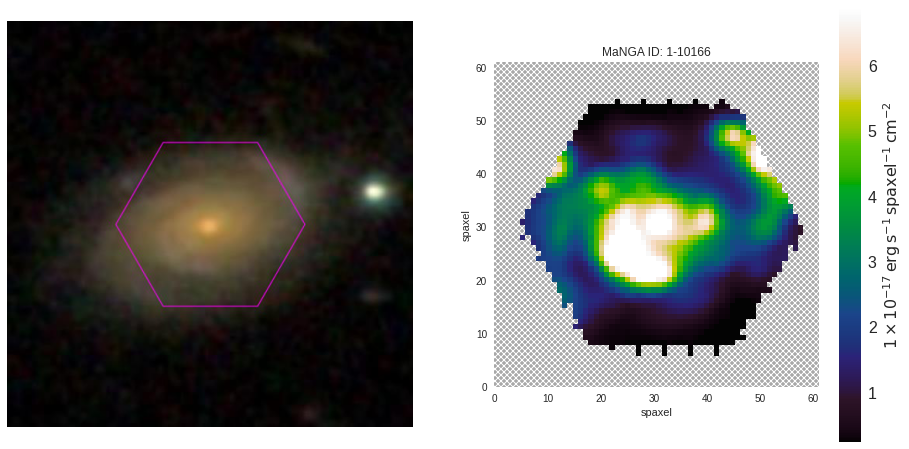

[WARNING]: Warning: converting a masked element to nan. (UserWarning)


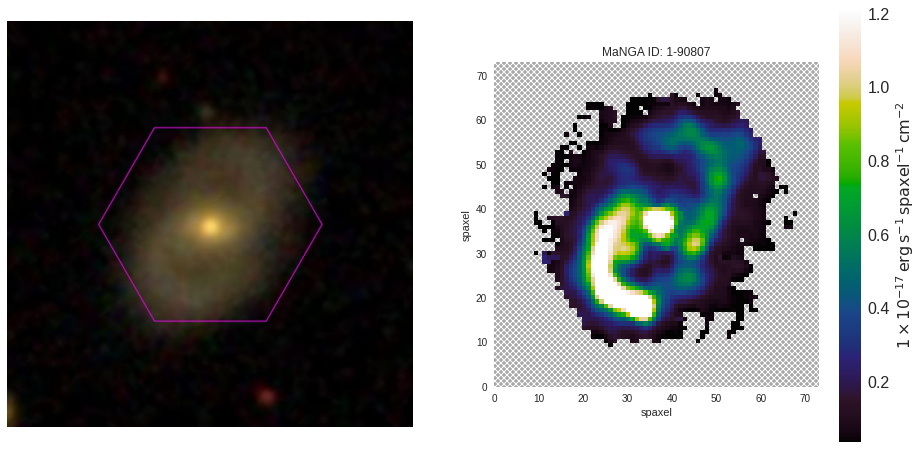

[WARNING]: Warning: converting a masked element to nan. (UserWarning)


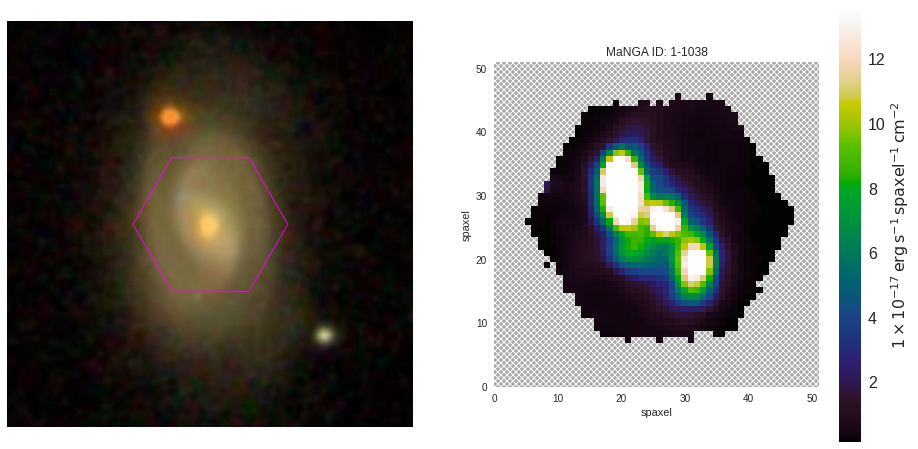

[WARNING]: Warning: converting a masked element to nan. (UserWarning)


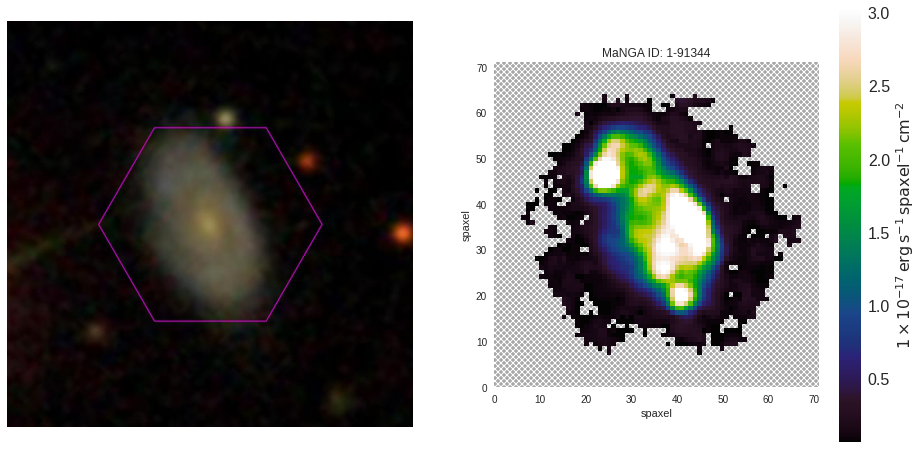

[WARNING]: Warning: converting a masked element to nan. (UserWarning)


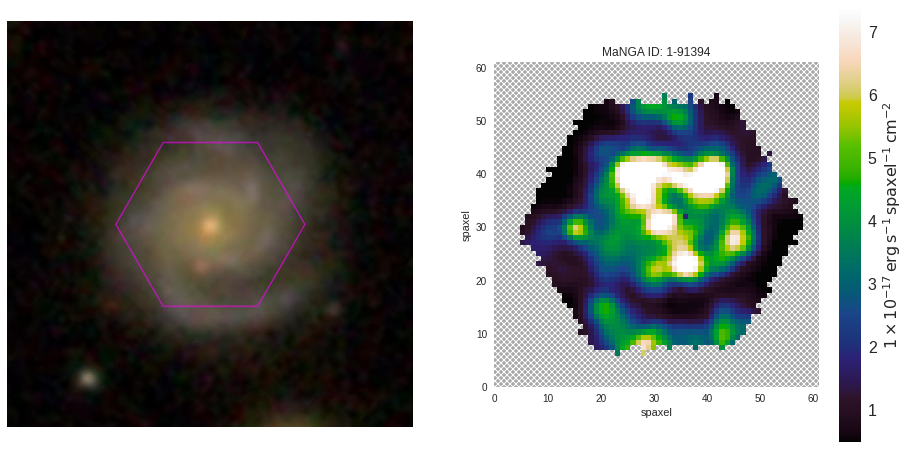

In [5]:
for path in usable_paths[0:5]:
    data = gz3d_fits.gz3d_fits(path)
    
    mangaid = data.metadata['MANGAID'][0]
    
    maps = Maps(mangaid)
    hamap = maps.emline_gflux_ha_6564

    fig, axes = plt.subplots(1, 2, figsize=(16, 8))

    axes[0].imshow(data.image)
    axes[0].grid(False)
    axes[0].set_xticks([])
    axes[0].set_yticks([])

    hamap.plot(fig=fig, ax=axes[1])
    
    plt.title('MaNGA ID: {}'.format(mangaid))
    plt.show()

In [7]:
for i in range(len(usable_paths)):
    path = usable_paths[i]
    
    if path.split('/')[-1].split('_')[0] == '1-37245':
        print(i)

451


[WARNING]: Warning: converting a masked element to nan. (UserWarning)


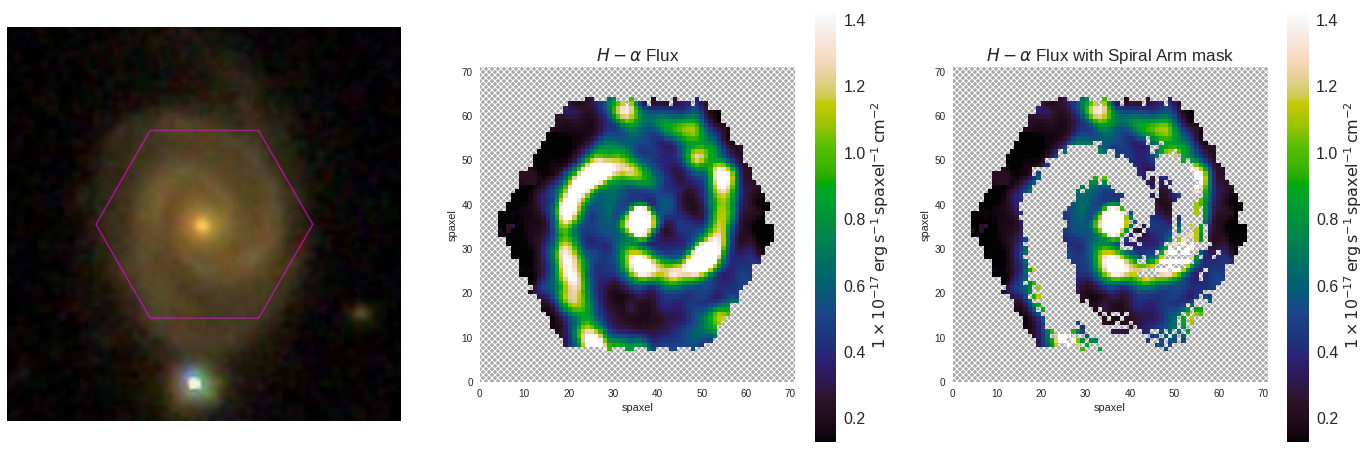

In [24]:
path = usable_paths[451]

data = gz3d_fits.gz3d_fits(path)

mangaid = data.metadata['MANGAID'][0]

maps = Maps(mangaid)
hamap = maps.emline_gflux_ha_6564
cbrange = hamap.plot(return_cbrange=True)

data.make_all_spaxel_masks(grid_size=hamap.shape)

spiral_mask = (data.spiral_mask_spaxel > 3) * hamap.pixmask.labels_to_value('DONOTUSE')
mask = spiral_mask | hamap.mask

fig, axes = plt.subplots(1, 3, figsize=(24, 8))

axes[0].imshow(data.image)
axes[0].grid(False)
axes[0].set_xticks([])
axes[0].set_yticks([])

hamap.plot(fig=fig, ax=axes[1])
hamap.plot(fig=fig, ax=axes[2], mask=mask, cbrange=cbrange)

axes[1].set_title(r'$H-\alpha$ Flux', size=17)
axes[2].set_title(r'$H-\alpha$ Flux with Spiral Arm mask', size=17)

plt.show()